### Importimi i librarive

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from pandas.io.json import json_normalize
import pandas as pd

pd.set_option('display.max_rows', 500)


In [8]:
df = pd.read_csv('dataset.csv')

In [9]:
df.head()

,userID,target,date,guest,orderID,shippingCosts,productID,price,amount,currency,formerPrice
0,JnTXDoxs21UzZWTQSvTB,vergani,2019-06-11 16:37:01.325,True,24457,15.0,6259,9.0,1.0,CHF,9.0
1,JnTXDoxs21UzZWTQSvTB,vergani,2019-06-11 16:37:01.325,True,24457,15.0,6690,18.0,1.0,CHF,18.0
2,JnTXDoxs21UzZWTQSvTB,vergani,2019-06-11 16:37:01.325,True,24457,15.0,6427,18.0,1.0,CHF,18.0
3,JnTXDoxs21UzZWTQSvTB,vergani,2019-06-11 16:37:01.325,True,24457,15.0,6433,18.0,1.0,CHF,18.0
4,JnTXDoxs21UzZWTQSvTB,vergani,2019-06-11 16:37:01.325,True,24457,15.0,6426,18.0,1.0,CHF,18.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userID         681 non-null    object 
 1   target         681 non-null    object 
 2   date           681 non-null    object 
 3   guest          681 non-null    bool   
 4   orderID        681 non-null    int64  
 5   shippingCosts  681 non-null    float64
 6   productID      681 non-null    int64  
 7   price          681 non-null    float64
 8   amount         681 non-null    float64
 9   currency       681 non-null    object 
 10  formerPrice    681 non-null    float64
dtypes: bool(1), float64(4), int64(2), object(4)
memory usage: 54.0+ KB


In [11]:
df.target.value_counts()

vergani    681
Name: target, dtype: int64

In [12]:
df.columns

Index(['userID', 'target', 'date', 'guest', 'orderID', 'shippingCosts',
       'productID', 'price', 'amount', 'currency', 'formerPrice'],
      dtype='object')

### Detyra e pare

In [13]:
# 1.1
daily_counts = (pd.to_datetime(df['date'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='total_orders_daily'))
daily_counts

,date,total_orders_daily
0,2019-08-08,43
1,2019-07-03,25
2,2019-07-12,25
3,2019-07-02,24
4,2019-06-30,23
5,2019-07-13,19
6,2019-07-11,19
7,2019-08-09,18
8,2019-08-01,18
9,2019-07-18,17


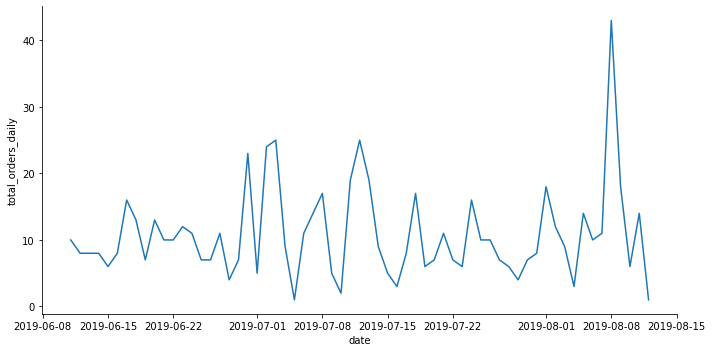

In [14]:
# 1.2
sns.relplot(
    data=daily_counts, 
    x="date", y="total_orders_daily", 
    kind="line", height=5, aspect=2 
)

### Detyra e dyte

In [15]:
#2.1 
guest_count = df.guest.value_counts().rename_axis('guest').reset_index(name='guest_count')
guest_count.loc[ guest_count['guest'] == True, 'guest'] = 'Guest'
guest_count.loc[ guest_count['guest'] == False, 'guest'] = 'Logged In'

In [16]:
guest_count

,guest,guest_count
0,Guest,444
1,Logged In,237


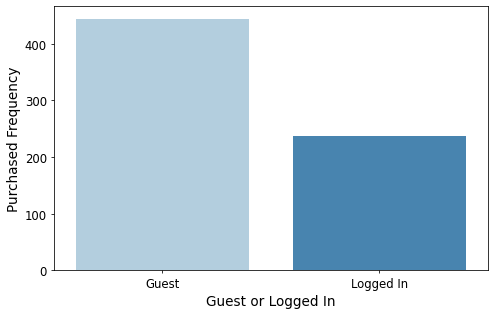

In [17]:
plt.rcParams['figure.dpi'] = 70
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='guest',y='guest_count',data=guest_count, palette="Blues",ci=None);
plt.xlabel('Guest or Logged In', size=14)
plt.ylabel('Purchased Frequency',size=14)
plt.xticks(size=12)
plt.yticks(size=12);

### Detyra e trete

In [18]:
ten_percent_of_df = int(round(0.1*len(df.index), 2))

df.productID.value_counts().head(ten_percent_of_df)

6466    25
6262    16
7093    13
7191    10
7005     9
7288     8
6405     8
4572     7
27       7
7071     7
6300     7
7184     6
7306     6
7137     6
6794     5
6506     5
6335     5
6946     5
7303     5
6314     5
7190     5
7178     5
7138     4
7215     4
6552     4
6419     4
6415     4
6409     4
7285     4
7272     4
6390     4
6739     4
6263     4
7144     4
7234     4
7262     4
7322     4
7173     4
4573     4
7353     4
7101     4
7095     4
7177     3
6507     3
6743     3
6830     3
6671     3
6862     3
6890     3
6793     3
6261     3
6428     3
6406     3
6366     3
6348     3
7201     3
6336     3
6334     3
7346     3
6279     3
6309     3
6283     3
7269     3
6275     3
6274     3
6923     3
7168     3
7108     3
Name: productID, dtype: int64

### Detyra e katert

In [19]:
df.groupby(['target'])['orderID'].sum()

target
vergani    16789537
Name: orderID, dtype: int64

In [20]:
#mean-average
#njejte perdoret edhe per funksionet min,max etj
df.groupby(['target'])['orderID'].mean()

target
vergani    24654.239354
Name: orderID, dtype: float64

In [21]:
#grupimi ne kolona
df.groupby(['target','date'])['orderID','price'].sum()

<ipython-input-21-223dab1a8408>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['target','date'])['orderID','price'].sum()


orderID   price
target  date                                    
vergani 2019-06-11 16:37:01.325   122285    81.0
        2019-06-11 17:23:34.075    24458    18.8
        2019-06-11 19:47:08.169    97844   234.8
        2019-06-12 06:36:45.509    24463    70.0
        2019-06-12 07:09:05.921    24465    46.0
        2019-06-12 09:32:35.639    24467    31.5
        2019-06-12 11:28:07.498    24468    13.0
        2019-06-12 11:31:05.204    97876    72.8
        2019-06-13 11:18:36.725    24474   122.5
        2019-06-13 12:23:29.930    24475    19.0
        2019-06-13 14:15:19.705    24476   225.0
        2019-06-13 14:21:24.119    24478     9.0
        2019-06-13 14:48:08.120    24479    19.5
        2019-06-13 15:14:25.474    24480    20.0
        2019-06-13 19:34:16.446    48962    38.3
        2019-06-14 08:37:38.433    24483    24.9
        2019-06-14 09:52:51.089    97936   106.5
        2019-06-14 11:19:54.678    73455   194.0
        2019-06-15 11:04:05.034    24486   150.0
        2019-06-15 13:25:13.708    24487    30.0
        2019-06-15 15:22:42.803    24488    30.0
        2019-06-15 19:48:44.400    48978    99.0
        2019-06-15 21:51:23.362    24490    10.0
        2019-06-16 09:50:58.308    24491   151.0
        2019-06-16 12:22:07.688    24492    18.0
        2019-06-16 13:56:00.760    24493    12.6
        2019-06-16 19:39:03.254    73485    66.0
        2019-06-16 20:14:29.039    24496    81.0
        2019-06-16 20:19:29.484    24497    37.0
        2019-06-17 06:20:47.392    48996    26.1
        2019-06-17 08:04:45.024    49000    30.8
        2019-06-17 11:40:15.696    49006    54.0
        2019-06-17 16:32:24.723    73518   213.4
        2019-06-17 17:49:19.873    24507    30.0
        2019-06-17 21:19:51.007   147048   104.9
        2019-06-18 10:41:14.436    24510    12.5
        2019-06-18 12:08:12.741    98048   114.1
        2019-06-18 12:23:18.915    24513    38.0
        2019-06-18 15:49:57.145    24514    12.5
        2019-06-18 17:16:39.930    49030    30.5
        2019-06-18 17:30:16.892    24516    18.6
        2019-06-18 17:49:33.187    24517    13.5
        2019-06-18 18:46:43.591    24518    18.5
        2019-06-18 21:51:33.221    24519   100.0
        2019-06-19 06:41:34.502    24520   151.0
        2019-06-19 08:40:06.329    49042    84.0
        2019-06-19 16:17:16.663    24524    17.0
        2019-06-19 18:50:31.143    49050    30.3
        2019-06-19 19:15:04.560    24526    16.4
        2019-06-20 06:56:52.945    49054    78.5
        2019-06-20 08:08:07.703    73584    87.9
        2019-06-20 08:15:53.746   122645   216.3
        2019-06-20 11:10:49.833    24530    37.0
        2019-06-20 14:08:26.463    49062    40.3
        2019-06-21 04:59:09.978    24532    14.5
        2019-06-21 06:34:15.928    49066    29.0
        2019-06-21 14:36:02.606   122670    92.0
        2019-06-21 23:20:05.385    49070   111.5
        2019-06-22 09:38:20.068    24536    41.5
        2019-06-22 09:39:57.539    24537    14.5
        2019-06-22 09:48:40.080    49076    26.8
        2019-06-22 10:04:44.152    24539    13.8
        2019-06-22 11:33:18.974    24540   110.0
        2019-06-22 11:50:15.971    24541    44.6
        2019-06-22 12:08:05.065    24542    34.0
        2019-06-22 14:23:48.899    49088   115.0
        2019-06-23 12:36:53.724    24545    16.4
        2019-06-23 15:50:20.443    24546    47.0
        2019-06-23 17:04:57.108    24547    12.9
        2019-06-23 17:27:32.492    49096    31.3
        2019-06-23 18:40:12.477   122745   117.0
        2019-06-23 19:51:34.747    49100   255.0
        2019-06-24 04:47:39.684    24551    14.5
        2019-06-24 07:51:04.427    73662   164.5
        2019-06-24 10:34:06.985    24556    13.0
        2019-06-24 13:24:13.217    24558    12.9
        2019-06-24 14:06:43.223    98236   129.5
        2019-06-24 16:10:06.580    24560   255.0
        2019-06-25 17:10:57.146   147372   297.7
        2019-06-25 18:38:11.463    24563    18.5
        2019-06

In [22]:
#funskionet te shumefishta
df.groupby(['target'])['orderID'].agg(['mean','sum'])

,mean,sum
target,,
vergani,24654.239354,16789537


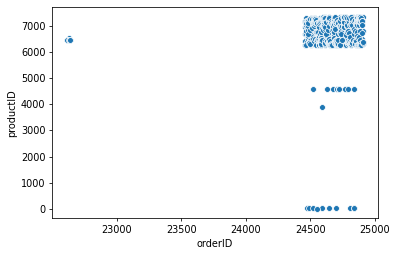

In [23]:
sns.scatterplot(data=df, x="orderID", y="productID")


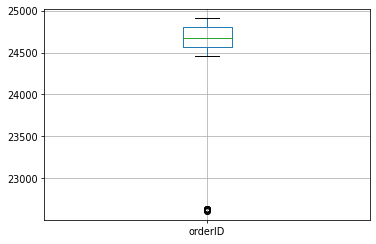

In [24]:
df.boxplot( column =['orderID'])

### Detyra e peste

In [25]:
df.shippingCosts.value_counts()

0.0     637
15.0     44
Name: shippingCosts, dtype: int64

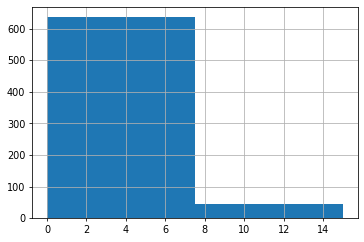

In [26]:
df['shippingCosts'].hist(bins=2)


C:\Users\Lenovo\anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


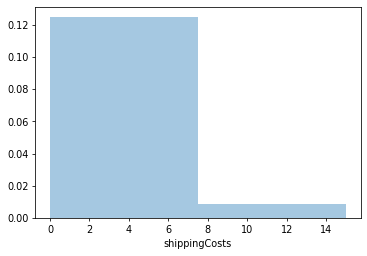

In [27]:
sns.distplot(df['shippingCosts'],bins=2)